In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dollar-exchange-rates-asian-countries/dataset.csv


All the important libraries are to be imported 

In [2]:
import seaborn
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime

**Data Analysis**

In [3]:
df=pd.read_csv(r'/kaggle/input/dollar-exchange-rates-asian-countries/dataset.csv')
df.head()

,Date,CNY=X,OMR=X,IRR=X,THB=X,SYP=X,EUR=X,MYR=X,YER=X,VND=X,...,LBP=X,TRY=X,TMT=X,SAR=X,MVR=X,QAR=X,MMK=X,NPR=X,BND=X,AFN=X
0,1/1/2004,NaN,0.38,NaN,39.24,NaN,0.79,3.81,NaN,NaN,...,NaN,NaN,NaN,3.75,NaN,3.64,NaN,NaN,1.69,NaN
1,1/2/2004,8.27,0.38,8236.2,39.53,47.23,0.79,3.80,NaN,15147.0,...,1474.1,NaN,NaN,3.75,NaN,3.64,6.18,70.60,1.68,NaN
2,1/5/2004,8.27,0.38,8731.5,39.26,47.25,0.79,3.80,NaN,15148.0,...,1474.6,NaN,NaN,3.75,NaN,3.64,6.18,70.62,1.68,NaN
3,1/6/2004,8.27,0.38,8724.7,39.03,47.21,0.79,3.80,NaN,15150.0,...,1473.8,NaN,NaN,3.75,NaN,3.64,6.18,70.58,1.68,NaN
4,1/7/2004,8.27,0.38,8728.7,38.97,47.22,0.79,3.81,NaN,15153.0,...,1474.3,NaN,NaN,3.75,NaN,3.64,6.18,70.60,1.68,NaN


In [4]:
df.describe()

,CNY=X,OMR=X,IRR=X,THB=X,SYP=X,EUR=X,MYR=X,YER=X,VND=X,ILS=X,...,LBP=X,TRY=X,TMT=X,SAR=X,MVR=X,QAR=X,MMK=X,NPR=X,BND=X,AFN=X
count,4941.000000,4946.000000,4141.000000,4927.000000,3247.000000,4928.000000,4948.000000,4726.000000,4949.000000,4926.000000,...,4919.000000,4680.000000,3419.000000,4923.000000,4550.000000,4943.000000,4935.000000,4918.000000,4923.000000,2935.000000
mean,6.886448,0.379990,21800.876165,33.589533,148.981478,0.811289,3.712427,220.234922,19962.675518,3.780292,...,1489.697073,3.802132,3.177078,3.748661,14.314125,3.629749,743.274424,90.672349,1.363914,127.300750
std,0.647358,0.000817,15063.854790,3.105895,184.528112,0.080617,0.450958,27.434909,3036.422619,0.375456,...,54.961968,3.820930,0.267509,0.008688,1.197709,0.040454,683.615046,19.755909,0.170233,1677.829053
min,5.860000,0.370000,40.000000,28.070000,41.020000,0.630000,2.900000,0.100000,20.890000,3.080000,...,0.880000,1.140000,2.080000,3.300000,12.000000,3.000000,6.050000,61.430000,0.660000,17.600000
25%,6.380000,0.380000,9113.000000,31.270000,46.980000,0.750000,3.270000,199.750000,16525.000000,3.510000,...,1475.695000,1.510000,2.850000,3.750000,12.650000,3.640000,6.310000,70.560000,1.290000,51.280000
50%,6.780000,0.380000,11169.000000,32.750000,50.370000,0.810000,3.750000,214.750000,20912.000000,3.720000,...,1499.900000,2.085000,3.350000,3.750000,15.150000,3.640000,945.640000,93.580000,1.350000,67.520000
75%,7.070000,0.380000,42000.000000,35.150000,99.370000,0.880000,4.140000,249.750000,22675.000000,3.940000,...,1507.000000,4.740000,3.400000,3.750000,15.210000,3.640000,1340.000000,107.377500,1.430000,77.000000
max,8.280000,0.390000,90000.000000,42.100000,514.000000,1.040000,4.750000,250.800000,24871.000000,4.730000,...,1533.500000,18.700000,3.850000,3.780000,15.850000,3.900000,2090.550000,131.330000,1.710000,50235.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956 entries, 0 to 4955
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4956 non-null   object 
 1   CNY=X   4941 non-null   float64
 2   OMR=X   4946 non-null   float64
 3   IRR=X   4141 non-null   float64
 4   THB=X   4927 non-null   float64
 5   SYP=X   3247 non-null   float64
 6   EUR=X   4928 non-null   float64
 7   MYR=X   4948 non-null   float64
 8   YER=X   4726 non-null   float64
 9   VND=X   4949 non-null   float64
 10  ILS=X   4926 non-null   float64
 11  JPY=X   4928 non-null   float64
 12  LKR=X   4921 non-null   float64
 13  IQD=X   4934 non-null   float64
 14  PKR=X   4912 non-null   float64
 15  KWD=X   4921 non-null   float64
 16  KHR=X   4912 non-null   float64
 17  UZS=X   4594 non-null   float64
 18  SGD=X   4940 non-null   float64
 19  INR=X   4925 non-null   float64
 20  BDT=X   4943 non-null   float64
 21  PHP=X   4922 non-null   float64
 22  

**Data Cleaning**

In [6]:
for i in df:
    if i!='Date':
        print(" mean - ", df[i].mean(), " median - ",df[i].median(), " mode - ",df[i].mode())

 mean -  6.886448087431693  median -  6.78  mode -  0    8.27
dtype: float64
 mean -  0.3799898908208653  median -  0.38  mode -  0    0.38
dtype: float64
 mean -  21800.876165177495  median -  11169.0  mode -  0    42000.0
dtype: float64
 mean -  33.58953318449361  median -  32.75  mode -  0    32.6
dtype: float64
 mean -  148.98147828765013  median -  50.37  mode -  0    514.0
dtype: float64
 mean -  0.8112885551948052  median -  0.81  mode -  0    0.89
dtype: float64
 mean -  3.7124272433306387  median -  3.75  mode -  0    3.8
dtype: float64
 mean -  220.23492170969106  median -  214.75  mode -  0    249.8
dtype: float64
 mean -  19962.675518286524  median -  20912.0  mode -  0    21090.0
dtype: float64
 mean -  3.780292326431182  median -  3.72  mode -  0    3.52
dtype: float64
 mean -  105.75426136363635  median -  108.275  mode -  0    109.41
dtype: float64
 mean -  142.5623572444625  median -  130.09  mode -  0    99.0
dtype: float64
 mean -  1226.3462626672072  median -  1172.

In [7]:
for i in df.columns:
    if i=='Date':
        continue
    mean_val = df[i].mean()
    df[i].fillna(mean_val,inplace=True)

In [8]:
df.describe()

,CNY=X,OMR=X,IRR=X,THB=X,SYP=X,EUR=X,MYR=X,YER=X,VND=X,ILS=X,...,LBP=X,TRY=X,TMT=X,SAR=X,MVR=X,QAR=X,MMK=X,NPR=X,BND=X,AFN=X
count,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,...,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.00000
mean,6.886448,0.379990,21800.876165,33.589533,148.981478,0.811289,3.712427,220.234922,19962.675518,3.780292,...,1489.697073,3.802132,3.177078,3.748661,14.314125,3.629749,743.274424,90.672349,1.363914,127.30075
std,0.646377,0.000816,13769.382416,3.096793,149.353349,0.080389,0.450594,26.790610,3034.277062,0.374317,...,54.756378,3.712990,0.222179,0.008659,1.147592,0.040401,682.164878,19.680009,0.169665,1291.08827
min,5.860000,0.370000,40.000000,28.070000,41.020000,0.630000,2.900000,0.100000,20.890000,3.080000,...,0.880000,1.140000,2.080000,3.300000,12.000000,3.000000,6.050000,61.430000,0.660000,17.60000
25%,6.380000,0.380000,9504.000000,31.280000,49.960000,0.750000,3.270000,199.772500,16532.750000,3.510000,...,1475.800000,1.520000,2.850000,3.750000,12.670000,3.640000,6.310000,70.587500,1.290000,65.50000
50%,6.780000,0.380000,21800.876165,32.770000,110.830000,0.810000,3.750000,214.750000,20910.000000,3.720000,...,1499.400000,2.200000,3.177078,3.750000,15.060000,3.640000,944.880000,92.795000,1.350000,78.55000
75%,7.070000,0.380000,37523.000000,35.130000,148.981478,0.880000,4.140000,249.750000,22674.850000,3.940000,...,1507.000000,3.980000,3.400000,3.750000,15.200000,3.640000,1339.800000,107.232500,1.430000,127.30075
max,8.280000,0.390000,90000.000000,42.100000,514.000000,1.040000,4.750000,250.800000,24871.000000,4.730000,...,1533.500000,18.700000,3.850000,3.780000,15.850000,3.900000,2090.550000,131.330000,1.710000,50235.00000


**Finding Outliers using Z-Score and replacing it with median**

In [9]:
df['Year']=pd.to_datetime(df['Date']).dt.year

In [10]:
for name in df.columns:
    if name == 'Date':
        continue
    mean_val=(df[name]-df[name].mean())
    z_score = mean_val/df[name].std()
    outliers = df[z_score > 3]
    print(f"The column '{name}' has {len(outliers)} outlier(s) based on the Z-score threshold of {3.0}.")
    median_val = df[name].median()
    if len(outliers)>0:
        df[name]=np.where(df[name]>median_val,median_val,df[name])

    

The column 'CNY=X' has 0 outlier(s) based on the Z-score threshold of 3.0.
The column 'OMR=X' has 14 outlier(s) based on the Z-score threshold of 3.0.
The column 'IRR=X' has 6 outlier(s) based on the Z-score threshold of 3.0.
The column 'THB=X' has 0 outlier(s) based on the Z-score threshold of 3.0.
The column 'SYP=X' has 0 outlier(s) based on the Z-score threshold of 3.0.
The column 'EUR=X' has 0 outlier(s) based on the Z-score threshold of 3.0.
The column 'MYR=X' has 0 outlier(s) based on the Z-score threshold of 3.0.
The column 'YER=X' has 0 outlier(s) based on the Z-score threshold of 3.0.
The column 'VND=X' has 0 outlier(s) based on the Z-score threshold of 3.0.
The column 'ILS=X' has 0 outlier(s) based on the Z-score threshold of 3.0.
The column 'JPY=X' has 17 outlier(s) based on the Z-score threshold of 3.0.
The column 'LKR=X' has 191 outlier(s) based on the Z-score threshold of 3.0.
The column 'IQD=X' has 0 outlier(s) based on the Z-score threshold of 3.0.
The column 'PKR=X' ha

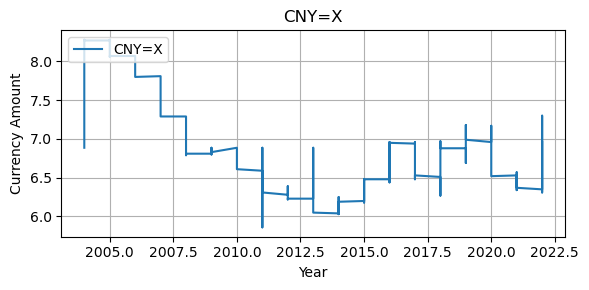

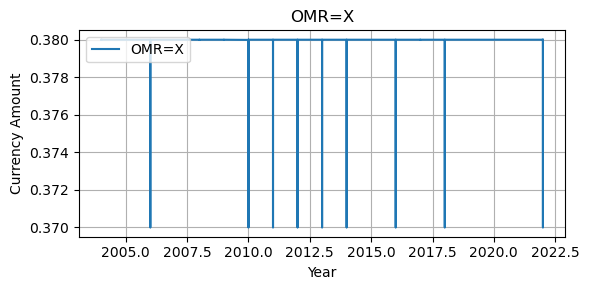

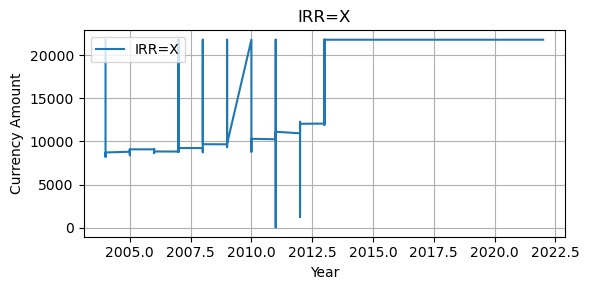

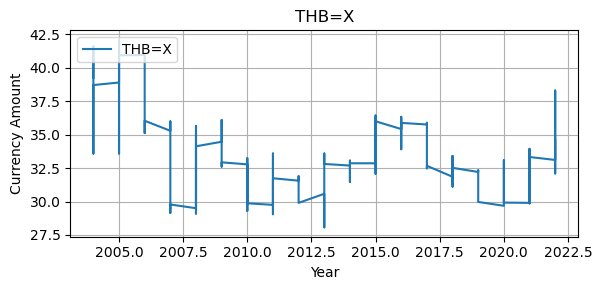

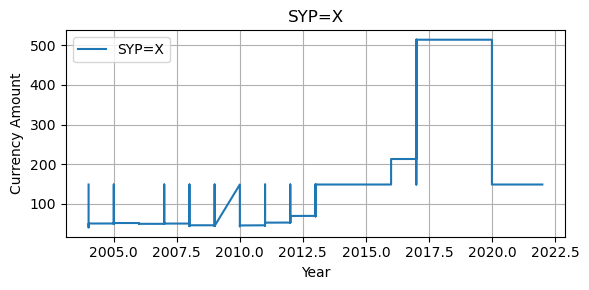

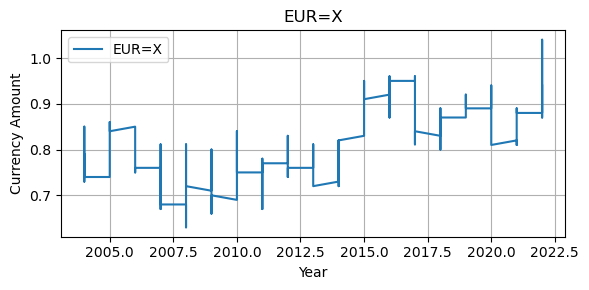

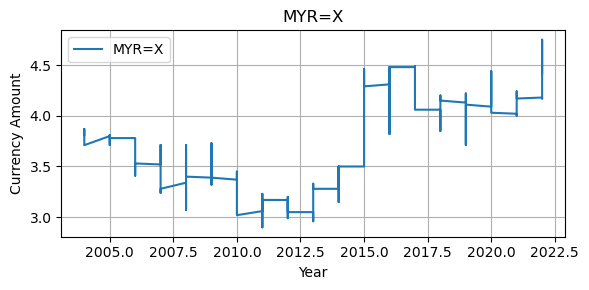

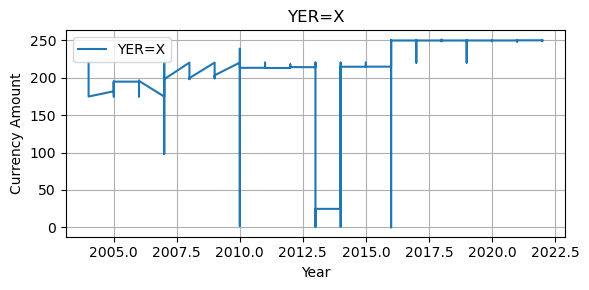

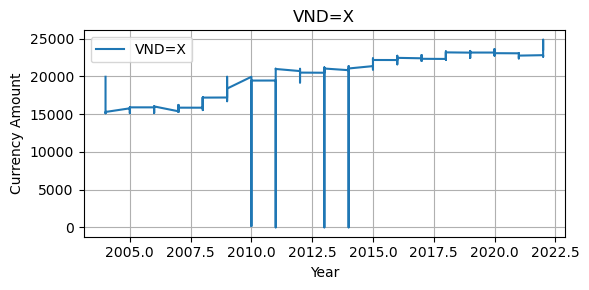

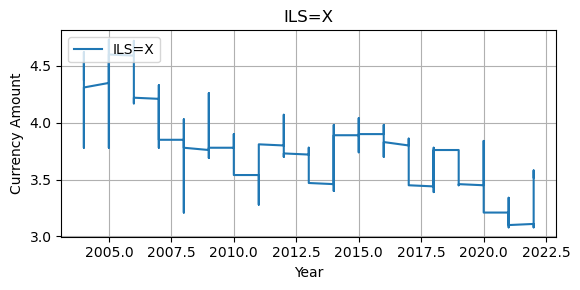

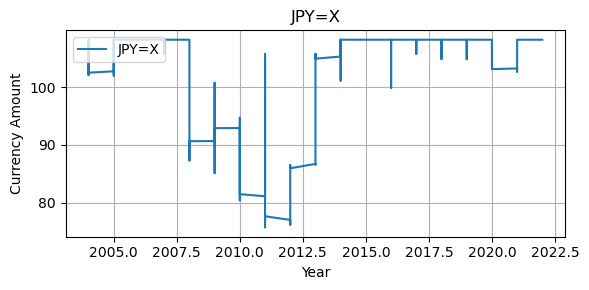

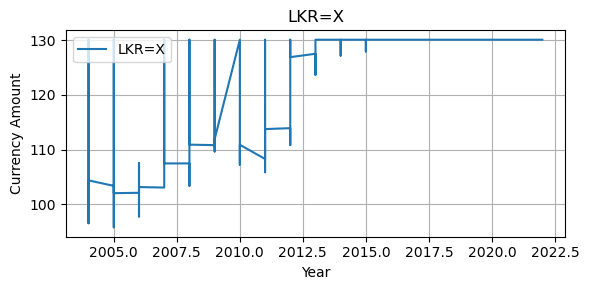

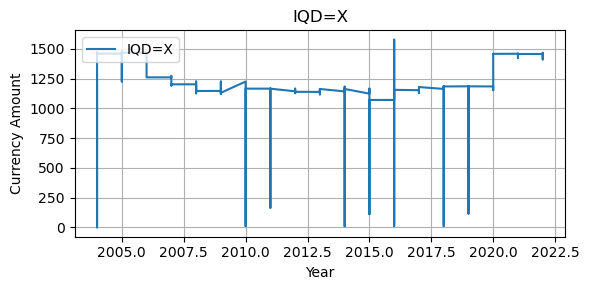

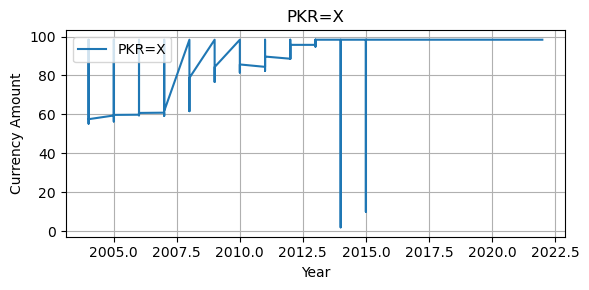

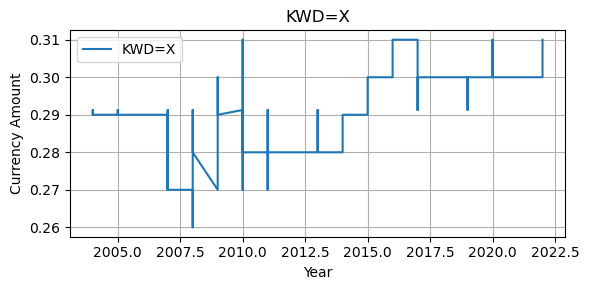

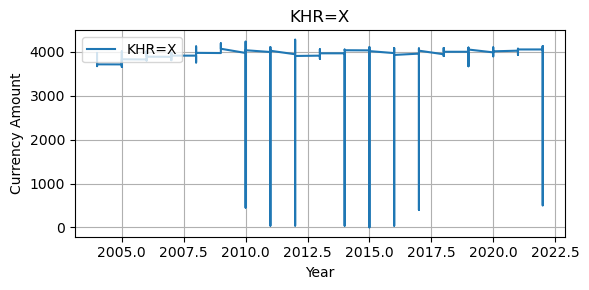

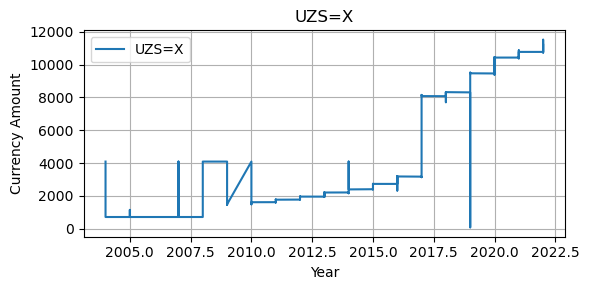

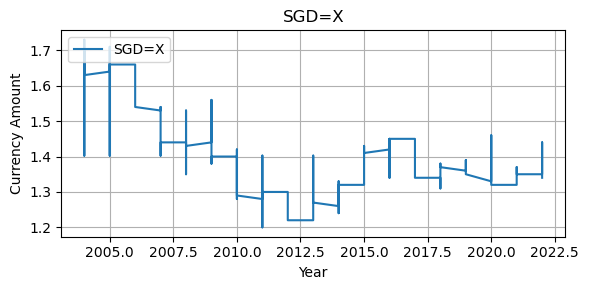

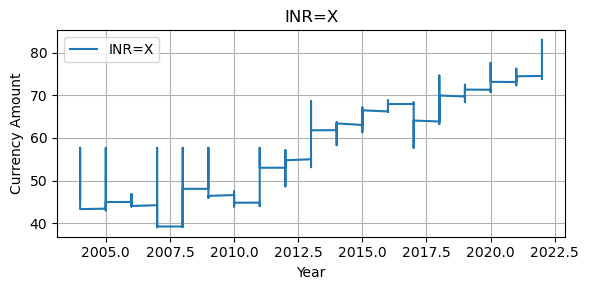

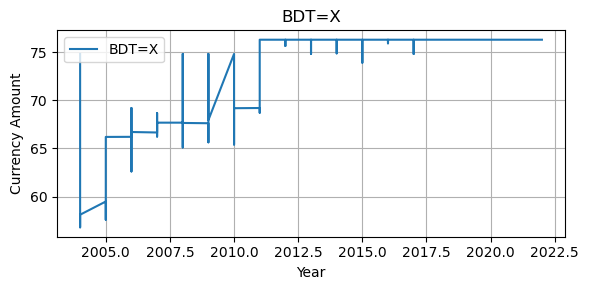

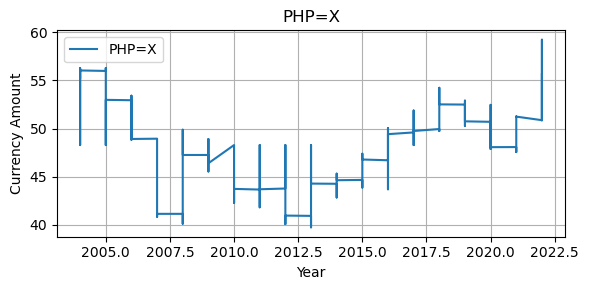

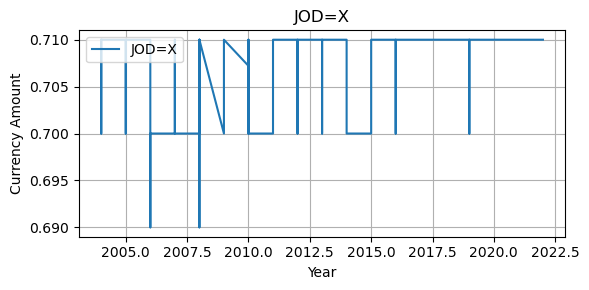

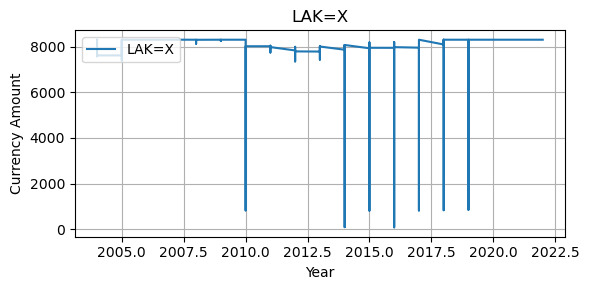

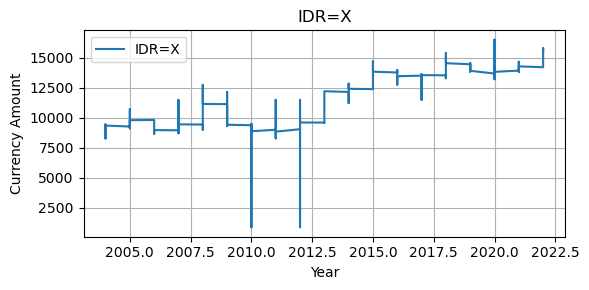

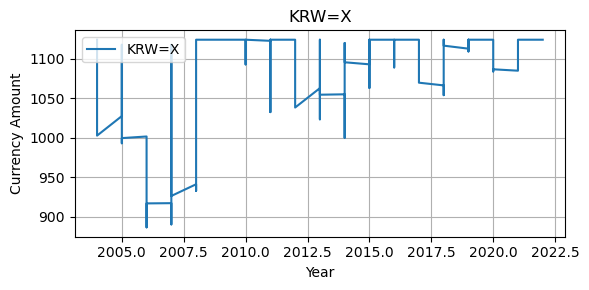

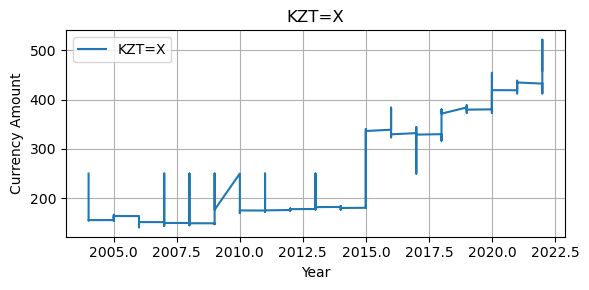

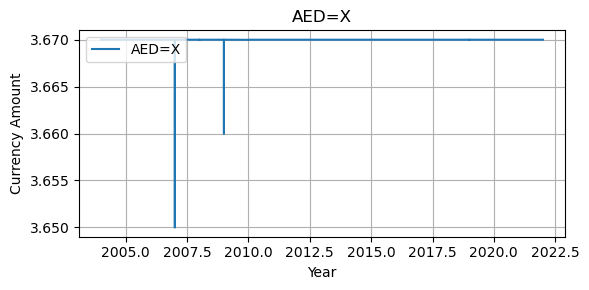

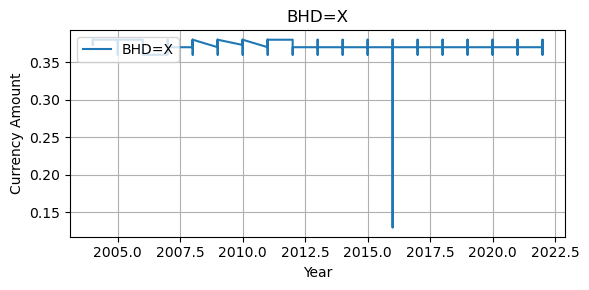

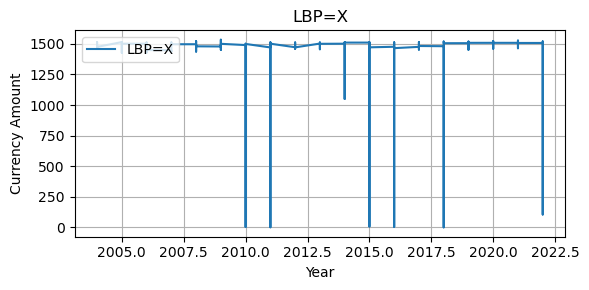

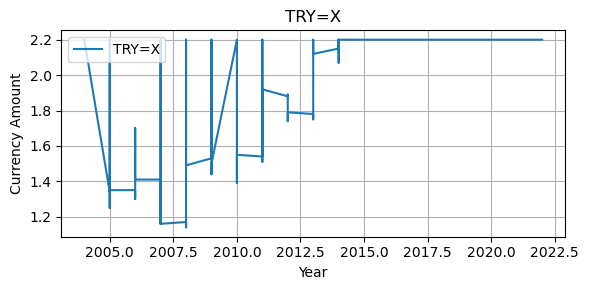

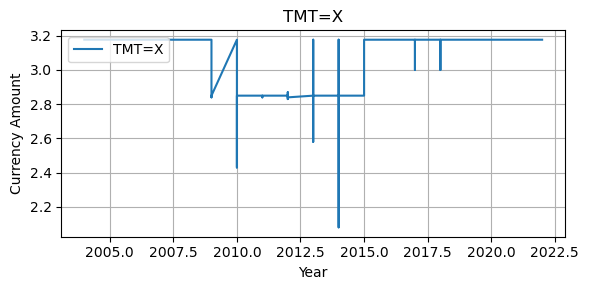

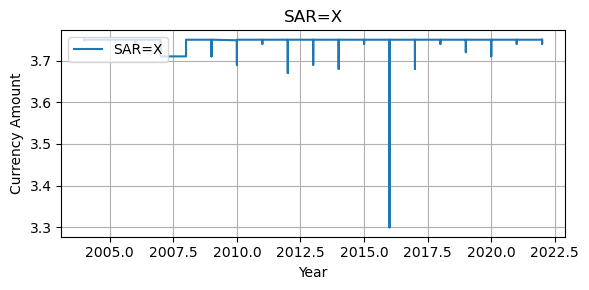

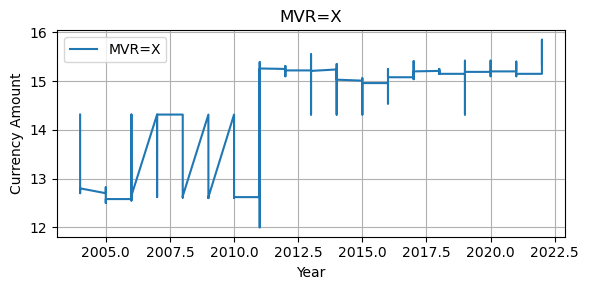

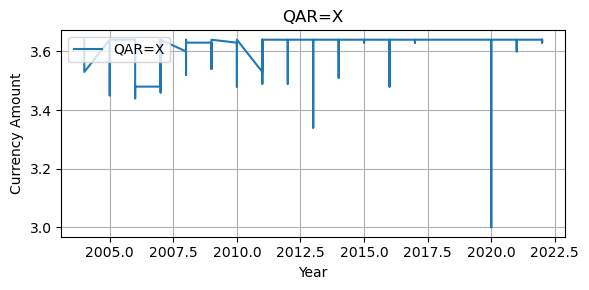

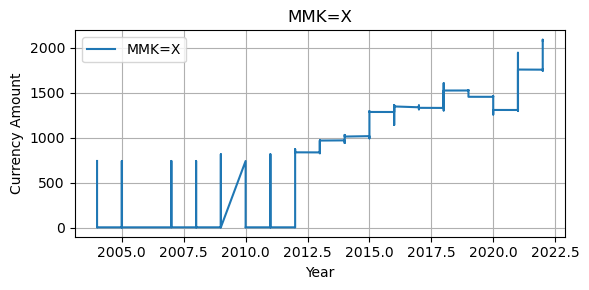

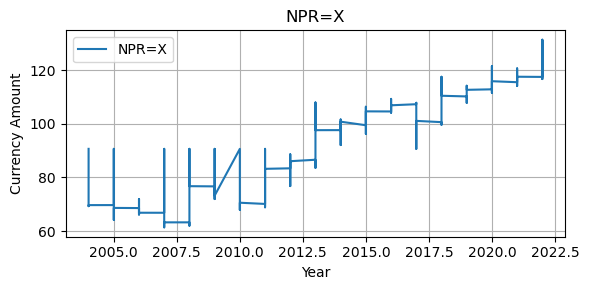

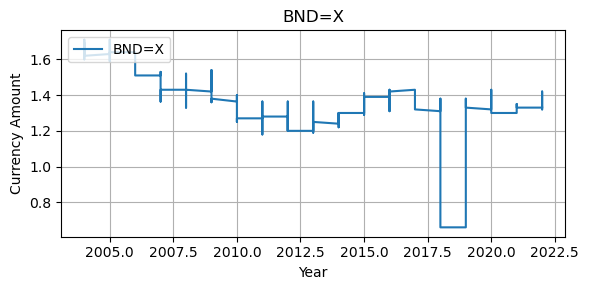

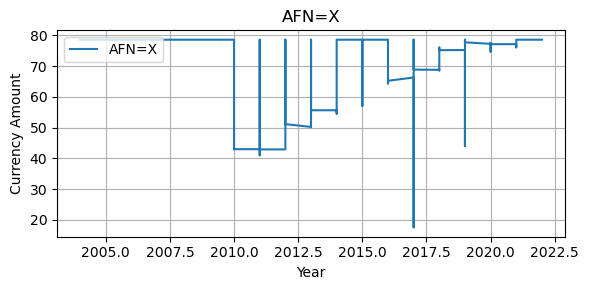

In [11]:
cols_to_plot =['CNY=X' ,'OMR=X', 'IRR=X','THB=X','SYP=X','EUR=X','MYR=X','YER=X','VND=X','ILS=X',
'JPY=X','LKR=X','IQD=X','PKR=X','KWD=X','KHR=X','UZS=X','SGD=X','INR=X','BDT=X','PHP=X','JOD=X',
'LAK=X','IDR=X','KRW=X','KZT=X','AED=X','BHD=X','LBP=X','TRY=X','TMT=X','SAR=X','MVR=X','QAR=X',
'MMK=X','NPR=X','BND=X','AFN=X']
for i in cols_to_plot:
    plt.figure(figsize=(6, 3))
    plt.plot(df['Year'], df[i], label=i)
    plt.xlabel('Year')
    plt.ylabel(f'Currency Amount')
    plt.title(f'{i}')
    plt.legend(loc='upper left')  
    plt.grid(True)  
    plt.tight_layout()  
    plt.show()

In [12]:
df.var()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CNY=X    4.178039e-01
OMR=X    3.819797e-07
IRR=X    3.678428e+07
THB=X    9.590125e+00
SYP=X    2.230642e+04
EUR=X    6.462345e-03
MYR=X    2.030346e-01
YER=X    7.177368e+02
VND=X    9.206837e+06
ILS=X    1.401134e-01
JPY=X    9.328215e+01
LKR=X    1.405985e+02
IQD=X    2.387438e+04
PKR=X    2.444979e+02
KWD=X    1.200177e-04
KHR=X    4.854829e+04
UZS=X    1.301737e+07
SGD=X    1.643926e-02
INR=X    1.503573e+02
BDT=X    3.111348e+01
PHP=X    1.965788e+01
JOD=X    2.042120e-05
LAK=X    2.005040e+05
IDR=X    5.396767e+06
KRW=X    4.017830e+03
KZT=X    1.165323e+04
AED=X    1.814347e-07
BHD=X    4.296585e-05
LBP=X    2.998261e+03
TRY=X    1.329526e-01
TMT=X    2.167869e-02
SAR=X    7.236268e-05
MVR=X    1.316967e+00
QAR=X    1.429478e-03
MMK=X    4.653489e+05
NPR=X    3.873028e+02
BND=X    2.878613e-02
AFN=X    1.534355e+02
Year     3.000504e+01
dtype: float64

In [13]:
df.corr()

,CNY=X,OMR=X,IRR=X,THB=X,SYP=X,EUR=X,MYR=X,YER=X,VND=X,ILS=X,...,TRY=X,TMT=X,SAR=X,MVR=X,QAR=X,MMK=X,NPR=X,BND=X,AFN=X,Year
CNY=X,1.000000,0.017546,-0.561229,0.734861,-0.232949,-0.041807,0.160859,-0.413541,-0.680031,0.757198,...,-0.400230,0.468501,-0.027393,-0.588264,-0.245994,-0.493378,-0.503337,0.719161,0.478491,-0.621580
OMR=X,0.017546,1.000000,0.024497,0.028755,0.021173,0.009539,0.042744,0.007243,0.000462,-0.003361,...,0.021978,0.057142,0.065757,0.021324,0.057596,0.021958,0.021638,0.013358,0.061959,0.010126
IRR=X,-0.561229,0.024497,1.000000,-0.273603,0.641930,0.676685,0.612769,0.721601,0.850056,-0.626458,...,0.827213,0.195311,0.104651,0.772907,0.296536,0.920568,0.929492,-0.474568,0.109865,0.888350
THB=X,0.734861,0.028755,-0.273603,1.000000,-0.246028,0.226598,0.327485,-0.329556,-0.479724,0.730101,...,-0.080775,0.454659,0.052643,-0.363064,-0.008354,-0.253257,-0.251897,0.674160,0.481037,-0.459884
SYP=X,-0.232949,0.021173,0.641930,-0.246028,1.000000,0.458230,0.499313,0.588089,0.584439,-0.373467,...,0.551285,0.281940,0.075471,0.493573,0.192836,0.634207,0.591953,-0.456907,0.146277,0.595524
EUR=X,-0.041807,0.009539,0.676685,0.226598,0.458230,1.000000,0.839013,0.584030,0.598891,-0.123185,...,0.691895,0.467758,0.151241,0.520350,0.225606,0.750758,0.754159,-0.042935,0.303330,0.646496
MYR=X,0.160859,0.042744,0.612769,0.327485,0.499313,0.839013,1.000000,0.570024,0.461519,-0.146489,...,0.596198,0.734717,0.066380,0.359444,0.186484,0.681967,0.699447,0.093663,0.599635,0.585858
YER=X,-0.413541,0.007243,0.721601,-0.329556,0.588089,0.584030,0.570024,1.000000,0.759784,-0.617051,...,0.688795,0.179048,0.077825,0.651829,0.294605,0.762631,0.779991,-0.431430,0.008440,0.807709
VND=X,-0.680031,0.000462,0.850056,-0.479724,0.584439,0.598891,0.461519,0.759784,1.000000,-0.731694,...,0.745858,-0.048793,0.130678,0.791187,0.327173,0.868702,0.882704,-0.619392,-0.170903,0.926483
ILS=X,0.757198,-0.003361,-0.626458,0.730101,-0.373467,-0.123185,-0.146489,-0.617051,-0.731694,1.000000,...,-0.424840,0.174925,-0.002036,-0.555674,-0.223638,-0.632761,-0.652927,0.634668,0.226294,-0.793833


In [14]:
df.cov()

,CNY=X,OMR=X,IRR=X,THB=X,SYP=X,EUR=X,MYR=X,YER=X,VND=X,ILS=X,...,TRY=X,TMT=X,SAR=X,MVR=X,QAR=X,MMK=X,NPR=X,BND=X,AFN=X,Year
CNY=X,0.417804,7.009514e-06,-2.200176e+03,1.470970,-22.488622,-2.172364e-03,0.046851,-7.161234,-1.333737e+03,1.832042e-01,...,-0.094329,4.458752e-02,-1.506177e-04,-0.436361,-6.011729e-03,-2.175480e+02,-6.402807,7.886860e-02,3.831093,-2.200800
OMR=X,0.000007,3.819797e-07,9.182464e-02,0.000055,0.001954,4.739283e-07,0.000012,0.000120,8.654909e-04,-7.774430e-07,...,0.000005,5.199902e-06,3.457179e-07,0.000015,1.345867e-06,9.257594e-03,0.000263,1.400730e-06,0.000474,0.000034
IRR=X,-2200.175881,9.182464e-02,3.678428e+07,-5138.823994,581478.757441,3.299232e+02,1674.607230,117249.418662,1.564350e+07,-1.422207e+03,...,1829.350809,1.744116e+02,5.399228e+00,5379.548674,6.799808e+01,3.808696e+06,110943.517067,-4.883393e+02,8253.811840,29512.919154
THB=X,1.470970,5.503574e-05,-5.138824e+03,9.590125,-113.791950,5.641091e-02,0.456971,-27.341580,-4.507744e+03,8.463212e-01,...,-0.091209,2.073070e-01,1.386794e-03,-1.290276,-9.780920e-04,-5.350105e+02,-15.351833,3.542149e-01,18.452429,-7.801131
SYP=X,-22.488622,1.954454e-03,5.814788e+05,-113.791950,22306.422977,5.501653e+00,33.602577,2353.102851,2.648557e+05,-2.087888e+01,...,30.022008,6.199955e+00,9.588501e-02,84.596767,1.088912e+00,6.461533e+04,1739.911848,-1.157801e+01,270.617108,487.204326
EUR=X,-0.002172,4.739283e-07,3.299232e+02,0.056411,5.501653,6.462345e-03,0.030391,1.257804,1.460824e+02,-3.706752e-03,...,0.020281,5.536470e-03,1.034240e-04,0.048004,6.856990e-04,4.117033e+01,1.193118,-5.855952e-04,0.302046,0.284681
MYR=X,0.046851,1.190377e-05,1.674607e+03,0.456971,33.602577,3.039128e-02,0.203035,6.881151,6.310009e+02,-2.470755e-02,...,0.097954,4.874404e-02,2.544383e-04,0.185868,3.176983e-03,2.096224e+02,6.202481,7.160493e-03,3.346838,1.446020
YER=X,-7.161234,1.199224e-04,1.172494e+05,-27.341580,2353.102851,1.257804e+00,6.881151,717.736770,6.176293e+04,-6.187905e+00,...,6.728540,7.062671e-01,1.773620e-02,20.040276,2.984090e-01,1.393755e+04,411.242021,-1.961034e+00,2.800733,118.531808
VND=X,-1333.737010,8.654909e-04,1.564350e+07,-4507.743889,264855.713724,1.460824e+02,631.000920,61762.933841,9.206837e+06,-8.310449e+02,...,825.201337,-2.179858e+01,3.372996e+00,2755.001349,3.753370e+01,1.798107e+06,52710.343702,-3.188693e+02,-6423.436811,15398.904703
ILS=X,0.183204,-7.774430e-07,-1.422207e+03,0.846321,-20.878884,-3.706752e-03,-0.024708,-6.187905,-8.310449e+02,1.401134e-01,...,-0.057985,9.640705e-03,-6.483213e-06,-0.238697,-3.165007e-03,-1.615730e+02,-4.809829,4.030677e-02,1.049243,-1.627670


<AxesSubplot:>

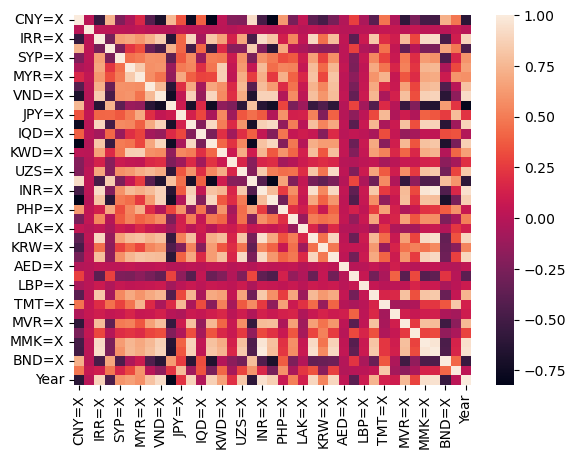

In [15]:
sns.heatmap(data=df.corr())

Countries with Positive Correlation - IRR,MMK, MVR, KRW, PHP, UZS, JPY, VND, MYR, SYP

Countries with Negative Correlation - CNR, BND,AED, LBP, LAK

Countries with aproximately Zero Correlation - TMT, IQD,

In [16]:
df['CNY=X_Inverse']=(1/df['CNY=X'])
df['BND=X_Inverse']=(1/df['BND=X'])
df['AED=X_Inverse']=(1/df['AED=X'])
df['LBP=X_Inverse']=(1/df['LBP=X'])
df['LAK=X_Inverse']=(1/df['LAK=X'])

In [17]:
cols_to_standardize  =['CNY=X' ,'OMR=X', 'IRR=X','THB=X','SYP=X','EUR=X','MYR=X','YER=X','VND=X','ILS=X',
'JPY=X','LKR=X','IQD=X','PKR=X','KWD=X','KHR=X','UZS=X','SGD=X','BDT=X','PHP=X','JOD=X',
'LAK=X','IDR=X','KRW=X','KZT=X','AED=X','BHD=X','LBP=X','TRY=X','TMT=X','SAR=X','MVR=X','QAR=X',
'MMK=X','NPR=X','BND=X','AFN=X','CNY=X_Inverse','BND=X_Inverse','AED=X_Inverse','LBP=X_Inverse',
             'LAK=X_Inverse' ]
for i in cols_to_standardize :
    correlation = df['INR=X'].corr(df[i])
    print(f'The correlation between INR and {i} are {correlation}')

The correlation between INR and CNY=X are -0.483029801755698
The correlation between INR and OMR=X are 0.022004759243845477
The correlation between INR and IRR=X are 0.9255501323925648
The correlation between INR and THB=X are -0.22992865991596564
The correlation between INR and SYP=X are 0.5920766231120189
The correlation between INR and EUR=X are 0.768976972248135
The correlation between INR and MYR=X are 0.71043787658025
The correlation between INR and YER=X are 0.7742107403974234
The correlation between INR and VND=X are 0.8757307667091795
The correlation between INR and ILS=X are -0.634891490743184
The correlation between INR and JPY=X are 0.36939352292973504
The correlation between INR and LKR=X are 0.8682926993047435
The correlation between INR and IQD=X are 0.05198364229796794
The correlation between INR and PKR=X are 0.8051913171022741
The correlation between INR and KWD=X are 0.7499694208665335
The correlation between INR and KHR=X are 0.15689807401484945
The correlation betw

positive correlstion with value greater than 0.5 -IRR=X, SYP=X, EUR=X, MYR=X, YER=X, VND=X, LKR=X, PKR=X, KWD=X, UZS=X, SGD=X, BDT=X, JOD=X, LAK=X, KZT=X, AED=X, BHD=X, TRY=X, MVR=X, MMK=X,NPR=X,

positive correlstion with value less than 0.5 - JPY=X, IQD=X, KHR=X, PHP=X, TMT=X, SAR=X, MVR=X,QAR=X, AFN=X, CNY=X_Inverse,BND=X_Inverse

approximately zero correlation - LAK=X, AED=X, LBP=X, LBP=X_Inverse,LAK=X_Inverse

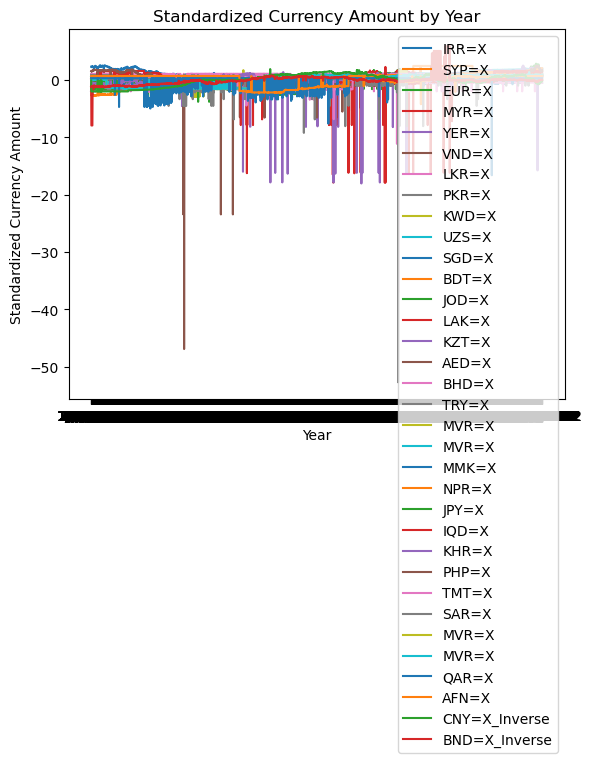

In [18]:
cols_to_standardize  =[ 'IRR=X', 'SYP=X', 'EUR=X', 'MYR=X', 'YER=X', 'VND=X', 'LKR=X', 'PKR=X', 'KWD=X', 
                       'UZS=X', 'SGD=X', 'BDT=X', 'JOD=X', 'LAK=X', 'KZT=X', 'AED=X', 'BHD=X', 'TRY=X', 
                       'MVR=X', 'MMK=X','NPR=X', 'JPY=X', 'IQD=X', 'KHR=X', 'PHP=X', 'TMT=X', 'SAR=X', 
                       'MVR=X','QAR=X','AFN=X', 
                       'CNY=X_Inverse','BND=X_Inverse' ]
df_subset = df[cols_to_standardize]

# Standardize the subset
df_subset_std = (df_subset - df_subset.mean()) / df_subset.std()

# Plot the standardized subset
for column in df_subset_std.columns:
    plt.plot(df.Date, df_subset_std[column], label=column)
    
plt.xlabel('Year')
plt.ylabel('Standardized Currency Amount')
plt.title('Standardized Currency Amount by Year')
plt.legend()
plt.show()

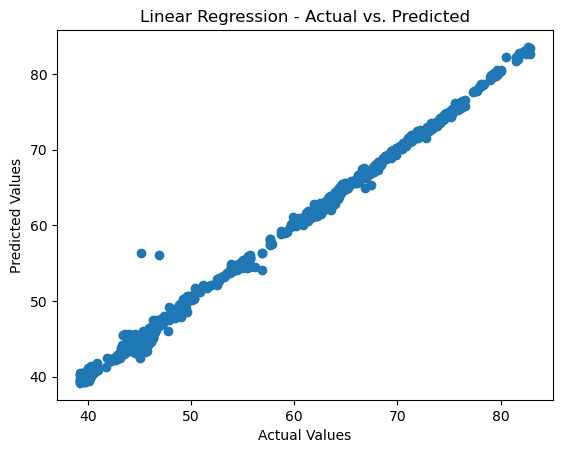

In [19]:
X = df[cols_to_standardize]
y= df['INR=X']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression - Actual vs. Predicted')
plt.show()

In [20]:

mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mse_test**0.5
mae_test = mean_absolute_error(y_test,y_pred)
print(f'Test MSE: {mse_test:.2f}')
print(f'Test RMSE: {rmse_test:.2f}')
print(f'Test MAE: {mae_test:.2f}')

Test MSE: 0.48
Test RMSE: 0.69
Test MAE: 0.39
